# Perception of Social Standing and Happiness: Report


In [16]:
# Set-up Python libraries 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
sns.set_theme(style='white')
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [26]:
#load the data 
happy = pd.read_csv('Happy.csv')

### <b> Introduction </b>

Social position, or status, is generally determined by factors such as income, education, employement, region and even social networks. However, perceptions of soical status are subjective and often influence people's emotional and psychological states significantly. Happiness can be defined as a state of well-being with feelings of contenment, joy and satisfaction. This report will explore the relationship between people's perceptions of their position in society and their overall happiness. I will investigate the assumption that people with better self-perceptions of social status will also be happier. Furthermore, this report will consider the associations between, and interactions with, other factors such as region, income, work and how excluded they feel in society.  

### <b> Data and Methods </b>

This analysis will explore data collected by YouGov in 2019 about people’s perception of their social standing and their happiness. 1000 people were polled and the data are intended to be representative of the UK population. The dependent variable is `happy` and the main independent variable is `ladder` (see descriptions below). The data was cleaned by excluding a filler value of 99 from the analysis as it was present in the ladder variable which is only scored from 1-11. It was also not present in age where a value of 99 is plausible. Two regression models will be analysed: one without controls and one including controls and an interaction. It is important to consider controls as other variables, such as income, may explain both ladder and happiness and reveal a spurious relation if the association between the two disappears. Alternatively, ladder may influence a variable such as leftout which in turn influences happiness or the association between ladder and happiness may change when we control for variables as happiness has multiple determinants. Therefore, the variables that will be controlled for are feelings of exclusion (`leftout`), `income`, `region` and employment status (`work`) (see descriptions below). Feelings of exclusion or marginalisation are linked to lower well being, senses of self-worth and decreased happiness. Furthermore, high incomes are associated with greater life satisfaction, increased security and relatively lower feelings of stress and depression. Another well-established determinant of happiness is work, which is often associated with income and would indirectly or directly influence people's perceptions of their social standing. For example, those with irregular or more stable sources of income may report varying levels of overall happiness. Finally, different regions may have different standards of living, costs of living, levels of social cohesion and provision of public services which may directly influence happiness. The extent to which perceived social standing influences happiness may also differ between regions because of varying social values. Adding these controls helps to isolate the effect of ladder on happiness from those based on differences in other variables and reduce any biased estimations based on the ommission of some variables. 

Overall, there was also no missing data for happy, region or work but 50 for ladder and 253 for income. 


#### <u> Relevant Variables </u>

* `happy`(a continuous measure ranging from 0-10, where higher scores are greater happiness)
* `ladder` (a continuous measure of 1-11 where participants rate themselves in their standing in society, where the lowest rung on the ladder was labelled “bottom of society” and the top rung as “top of society”)
* `leftout` (a categorical variable in which people state whether they agree or disagree that they feel left out of society)
* `work`(a categorical measure of working status with four categories)
* `income` (a categorical variable with four categories)
* `region` (a categorical variable with twelve categories)

In [140]:
#Replacing 99 filler value with NaN to clean data 
happy.replace(99, np.nan, inplace=True)

#Finding the number of missing data values (NaNs)
happy.isna().sum()

happy        0
ladder      50
sex          0
marital      2
educ         0
work         0
income     253
region       0
age          0
leftout      8
dtype: int64

### <b> Results</b>

#### <u> Descriptive Statistics </u>
The mean happiness score was 6.17 out of 10, with the mode and median score at 7. The standard deviation was 2.67 (n=1000). The middle 50% of the data ranges from 5 to 8 and suggests that most happy scores are concentrated within a relatively narrow range of positive values.

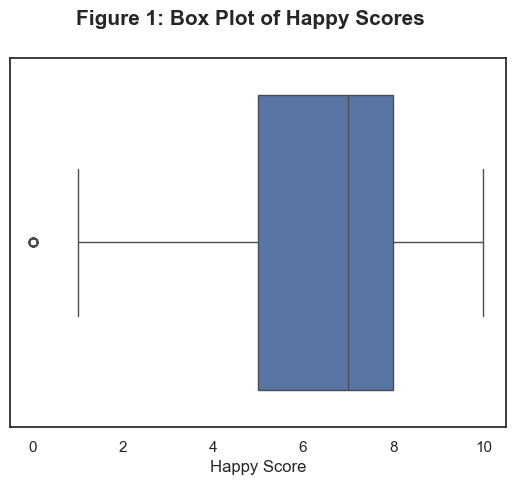

In [175]:
# Plotting a boxplot 
sns.boxplot(data=happy, x='happy')
plt.xlabel('Happy Score')
plt.suptitle('Figure 1: Box Plot of Happy Scores', fontsize=15, fontweight='bold')
plt.show()

In [85]:
# Obtaining descriptive statistics
happy.describe()

,happy,ladder,age
count,1000.00000,950.000000,1000.000000
mean,6.17300,6.295789,51.215000
std,2.36911,1.634031,16.724128
min,0.00000,1.000000,18.000000
25%,5.00000,6.000000,36.000000
50%,7.00000,6.000000,54.000000
75%,8.00000,7.000000,65.000000
max,10.00000,11.000000,87.000000


#### <u> The 1st Regression Model <u/>

In [349]:
# first we run this line to tell statsmodels where to find the data and the explanatory variables
reg_formula = sm.regression.linear_model.OLS.from_formula(data = happy, formula = 'happy ~ ladder')

# then we run this line to fit the regression (work out the values of intercept and slope)
# the output is a structure which we will call reg_results
reg_results = reg_formula.fit()

# let's view a summary of the regression results
reg_results.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  happy   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     130.3
Date:                Tue, 18 Mar 2025   Prob (F-statistic):           2.30e-28
Time:                        15:31:34   Log-Likelihood:                -2104.8
No. Observations:                 950   AIC:                             4214.
Df Residuals:                     948   BIC:                             4223.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9733      0.287     10.363      0.000       2.410       3.536
ladder         0.5035      0.044     11.414      0.000       0.417       0.590
==============================================================================
Omnibus:                       46.213   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.723
Skew:                          -0.559   Prob(JB):                     5.87e-12
Kurtosis:                       3.238   Cond. No.                         26.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [221]:
# calculating the RSME for model 1
reg_results.mse_resid**0.5

2.220492852682248

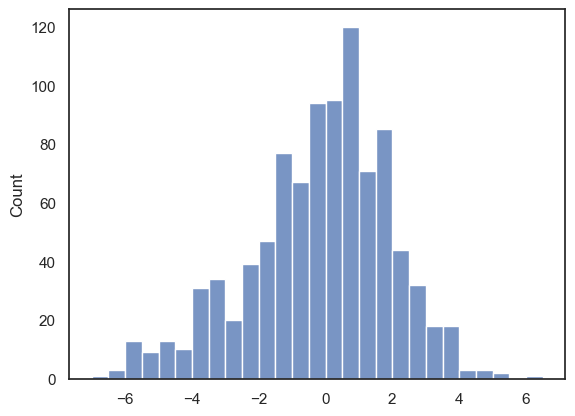

In [351]:
#Checking whether the residuals are normally distributed by plotting a histogram
sns.histplot(reg_results.resid)
plt.show()

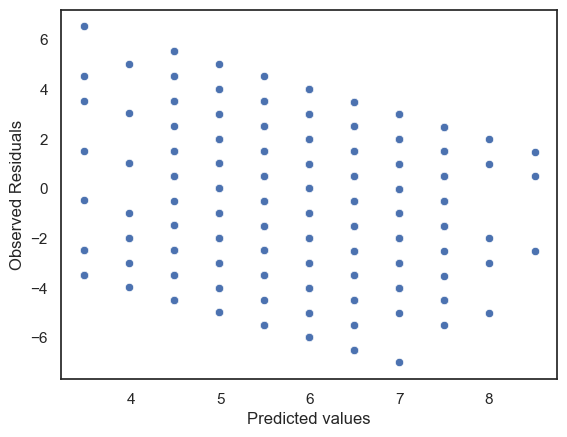

In [357]:
#Checking whether variance in the residuals looks roughly constant for all values of y-hat by plotting a scatterplot
residuals = reg_results.resid
y_hat = reg_results.predict()
sns.scatterplot(x=y_hat, y=residuals)
plt.xlabel('Predicted values')
plt.ylabel('Observed Residuals')
plt.show()

#### <u> The 2nd Regression Model </u>

In [324]:
# Simplifying and Grouping regions by area and arguably similar economic and cultural profiles.
happy['grouped_region'] = happy['region'].map({
    'South East': 'South',
    'London': 'London',
    'East of England': 'South',
    'South West': 'South West + Wales',
    'Wales': 'South West + Wales',
    'North West': 'North',
    'Yorkshire and the Humber': 'North',
    'North East': 'North',
    'West Midlands': 'Midlands',
    'East Midlands': 'Midlands',
    'Scotland': 'Scotland',
    'Northern Ireland': 'Northern Ireland'})

In [363]:
# first we run this line to tell statsmodels where to find the data and the explanatory variables
reg_formula = sm.regression.linear_model.OLS.from_formula(data = happy, formula = 'happy ~ ladder + work + income + grouped_region + leftout + ladder:grouped_region')

# then we run this line to fit the regression (work out the values of intercept and slope)
# the output is a structure which we will call reg_results
reg_results = reg_formula.fit()

# let's view a summary of the regression results
reg_results.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  happy   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     12.33
Date:                Tue, 18 Mar 2025   Prob (F-statistic):           2.72e-38
Time:                        15:35:00   Log-Likelihood:                -1502.9
No. Observations:                 717   AIC:                             3054.
Df Residuals:                     693   BIC:                             3164.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                       1.5042      1.000      1.503      0.133      -0.460       3.468
work[T.Full time student]                      -0.8746      0.566     -1.546      0.123      -1.985       0.236
work[T.Other]                                   0.6421      0.193      3.326      0.001       0.263       1.021
work[T.Unemployed/not working]                 -0.4371      0.261     -1.674      0.095      -0.950       0.076
income[T.Low]                                  -0.1125      0.257     -0.438      0.662      -0.617       0.392
income[T.Low-medium]                           -0.1126      0.222     -0.508      0.612      -0.548       0.323
income[T.Medium-high]                           0.2961      0.224      1.320      0.187      -0.144       0.736
grouped_region[T.Midlands]                      2.3173      1.199      1.933      0.054      -0.037       4.672
grouped_region[T.North]                         2.8783      1.159      2.484      0.013       0.604       5.153
grouped_region[T.Northern Ireland]              4.5605      3.429      1.330      0.184      -2.172      11.293
grouped_region[T.Scotland]                      1.1775      1.385      0.851      0.395      -1.541       3.896
grouped_region[T.South]                         2.1198      1.122      1.890      0.059      -0.082       4.322
grouped_region[T.South West + Wales]            1.0950      1.193      0.918      0.359      -1.248       3.438
leftout[T.Disagree]                             1.9102      0.261      7.325      0.000       1.398       2.422
leftout[T.Neither agree nor disagree]           1.1223      0.268      4.189      0.000       0.596       1.648
leftout[T.Strongly agree]                      -0.9091      0.401     -2.268      0.024      -1.696      -0.122
leftout[T.Strongly disagree]                    2.3188      0.301      7.710      0.000       1.728       2.909
ladder                                          0.4373      0.140      3.127      0.002       0.163       0.712
ladder:grouped_region[T.Midlands]              -0.3418      0.177     -1.928      0.054      -0.690       0.006
ladder:grouped_region[T.North]                 -0.3803      0.170     -2.241      0.025      -0.714      -0.047
ladder:grouped_region[T.Northern Ireland]      -0.7206      0.601     -1.198      0.231      -1.901       0.460
ladder:grouped_region[T.Scotland]              -0.1491      0.209     -0.714      0.476      -0.559       0.261
ladder:grouped_region[T.South]                 -0.2615      0.163     -1.602      0.110      -0.582       0.059
ladder:grouped_region[T.South West + Wales]    -0.1271      0.175     -0.727      0.468      -0.470       0.216
===========================================================

In [335]:
# To find the reference categories for the variables
print('work categories:'  + str(happy.work.unique()))
print('leftout categories:' + str(happy.leftout.unique()))
print('income categories:'+ str(happy.income.unique()))
print('grouped region categories:'+ str(happy.grouped_region.unique()))
print('region categories:'+ str(happy.region.unique()))

work categories:['Employed' 'Other' 'Full time student' 'Unemployed/not working']
leftout categories:['Agree' 'Disagree' 'Neither agree nor disagree' 'Strongly agree'
 'Strongly disagree' nan]
income categories:['Low-medium' 'Low' 'Medium-high' nan 'High']
grouped region categories:['South' 'North' 'London' 'South West + Wales' 'Midlands' 'Scotland'
 'Northern Ireland']
region categories:['South East' 'North West' 'East of England' 'London'
 'Yorkshire and the Humber' 'South West' 'West Midlands' 'North East'
 'East Midlands' 'Scotland' 'Northern Ireland' 'Wales']


In [311]:
# calculating the RSME for model 2
reg_results.mse_resid**0.5

2.004460805761663

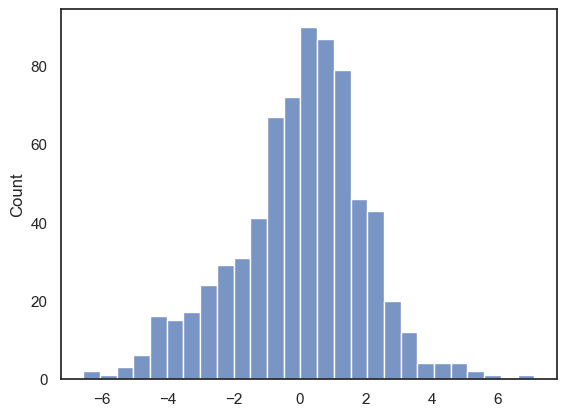

In [365]:
#Checking whether the residuals are normally distributed by plotting a histogram
sns.histplot(reg_results.resid)
plt.show()

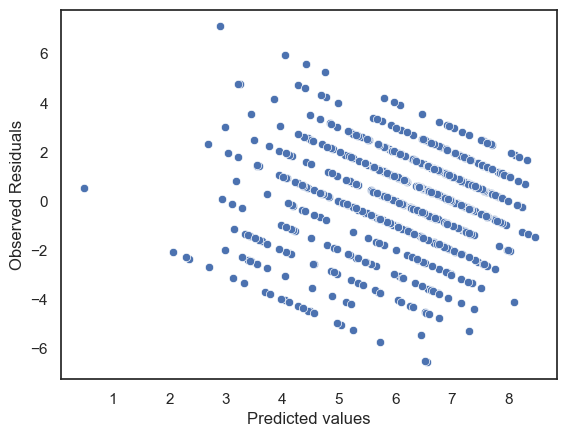

In [410]:
#Checking whether variance in the residuals looks roughly constant for all values of y-hat by plotting a scatterplot
residuals = reg_results.resid
y_hat = reg_results.predict()
sns.scatterplot(x=y_hat, y=residuals)
plt.xlabel('Predicted values')
plt.ylabel('Observed Residuals')
plt.show()

In [433]:
# Creating a data frame with only North and London in grouped_region column
filtered_happy = happy[happy["grouped_region"].isin(["North", "London", "Midlands"])]

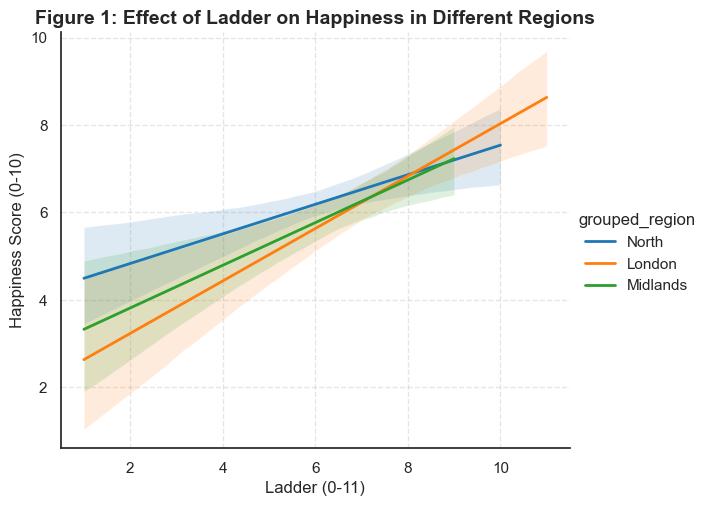

In [435]:
# Plotting the linear relationship between ladder and happiness to visualise the significant interaction by ladder and North region
sns.lmplot(data=filtered_happy, x='ladder', y='happy', hue='grouped_region', scatter=False, ci=95, palette='tab10', height=5, aspect=1.2, line_kws={'linewidth': 2}, scatter_kws={'alpha': 0.3})
plt.title("Figure 1: Effect of Ladder on Happiness in Different Regions", fontsize=14, fontweight='bold')
plt.xlabel("Ladder (0-11)", fontsize=12)
plt.ylabel("Happiness Score (0-10)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

#### <u> Findings </u>

In both models, the assumptions of a regression model have been met; the residuals are roughly normally distributed and look roughly similar at all values of yhat.

* <b>Association between perceived social standing and happy scores:</b>
In the first regression model, there is a significant positive association between perceived social position (ladder) and 'happy' scores (b=0.50, 95% CI: [0.417, 0.590], p=0.000), suggesting that people who rate themselves higher in society also tend to be happier. The 2nd regression model controls for levels of income, region, employement status (work) and feelings of exclusion in society and looks at interactions between grouped regions and 'ladder'. The association between ladder and happy remains significant but actually decreases (b=0.44, 95% CI: [0.163,0.712]), p=0.002).

* <b> Employement status and Income levels: </b> 
In addition, significant associations between happy scores and some of the control variables indicate the importance of not omitting these variables as they also explain variations in happy scores. For example, those with employement status 'other' had happy scores signficantly higher than those that are employed by 0.64 (95% CI:[0.264, 1.022], p=0.001). However, happy scores do not signficantly differ with low, low-medium or medium-high compared to high income levels after controlling other factors. 

* <b>Feelings of Exclusion:</b>
  Moreover, those who strongly disagree (b=2.31, 95% CI:[1.716, 2.900], p=0.00) or disagree (b=1.89, 95% CI:[1.379, 2.403], p=0.00) that they feel left out of society report signficantly higher happy scores than those who agree. Those who strongly agree they feel excluded from society also reported signficantly lower happy scores (b=-0.84,95% CI: [-1.632, -0.055], p=0.024). The model suggests that feelings of exclusion are another strong predictor of happiness, with a clear gradient from disagreement (higher happiness) to agreement (lower happiness). Leftout may even be an intervening variable where perceived social position influences how excluded an individual feels which in turn influence happy scores. Therefore, omitting this variable in the first model may have resulted in teh overestimation of ladder's effect on happiness. 

* <b>Region:</b>
Notably, there are some signficant associations and interactions between the grouped regions and happy scores. For example, those North (Yorkshire and the Humber and North East and West) report signfiicantly higher happy scores than that of london by 2.89 (95% CI: [0.604,5.153], p=0.013). Those in the South (South East and East of England) also reported higher happier scores, although this is borderline signficant and does not provide strong evidence of interaction (b=2.12, 95% CI:[-0.082,4.322], p=0.059). The 2nd model also highlights how region may moderate the relationship between perceptions of social standing and happiness where the effect of ladder on happiness is weaker (by -0.3803 units, 95% CI: [-0.714,-0.047], p=0.025) for those in the North compared to London. Figure 1 shows this effect as london has a steep, positive slope highlighting that ladder has the strongest effect on happiness. The slopes for the North and Midlands are much shallower suggesting that perceived social standing has less of an impact on happiness in these areas compared to London. In additon, the gap between happy scores between london and Northern regions widens at higher ladder values (above 8). Only the grouped region 'North', Midlands and London were included as the other interactions were not sufficientlt signficant and the overlapping lines obscured key differences.

* <b>Baseline happy scores (intercept):</b>
In the 1st model, those who report themselves to be at the bottom of society (ladder=0), have relatively low 'happy' scores of 2.97 (95% CI:[2.41, 3.536], p=0.00). The intercept, when income is high, work status is employed, people agree to feeling left out, regional reference group is London and ladder scores are 0, decreases to 1.50 and becomes insignificant and (95% CI: [-0.460,3.468], p=0.130). This is likely due to the reference group of London and its relatively low baseline level of happiness that is not significantly different to 0, the interaction accounting for regional differences or because of other controls.

* <b> Model Fit:</b>
The 2nd model also has a lower RSME (2.00 compared to 2.22 in the 1st) and a higher $R^2$ (increasing by more than 2-fold from 12.1% to 29%). This means the model's predictions are closer to the actual observed values and adding the controls explains more variation in happy scores. Overall, it can be concluded that the 2nd model is a better fit and explains variations in happy scores better.

### <b> Limitations </b>



Although the model provides some important insights into the relationship between perceived social standing and happiness, there are some significant limitations that need to be addressed. 

There are first some limitations with the study itself. For example, some of the sample sizes for categories of a variable are relatively small such as Northern Ireland with a sample of 15. This is insufficient to detect small differnces or changes and any conclusions drawn, such as in the interaction with ladder, are likely to be unrepresentative of the general population. To add, both ladder and happy scores would be self-reported so the subjectivity in people's interpretations of scales of happiness and leftout, making it difficult to make comparisons between individuals difficul to make. Only one report of happiness or ladder was made as well and may reflect a short-term mood, influenced by external factors such as having a bad day or week, rather than a more stable state of well-being. A possible suggestion for future research includes having multiple measures for happy (self-reported, behavioural records, reports from people close to them) recorded over a period of time. 

In additon, there are limitations with the model itself. For example, the regional grouping may also oversimplify and mask the effect of regional differences on happiness. In terms of model fit, although the 2nd model explains considerably more of the variation in happy scores, it does not account for around 71% of the variation. Therefore, a significant portion of the variance in happiness is not unexplained by model, suggesting that important predictors may be missing. Some other important determinants may include physical or mental health, job satisfaction (not simply status), work-life balance and even cultural or ethnic considerations. Overall, however, the $R^2$ of 29% once controls were added is still meaningul, especially in the social sciences where there are high levels of subjectivity and the existence multiple, interacting influences.


Furthermore, it is not enough to show associations for causality to be concluded. First causality requires for there to be non-spuriousness, where the relationship between happy and ladder is not due to a third confounding variable. The association between happy and ladder remained even after controlling for income, work, region and leftout meaning it is unlikely that the relationship between ladder and happy is spurious. The other assumption of causality, however, would require for perceived social perceptions to always occur before evaluations of happiness. This is likely not the case as levels of happiness, or relative well-being, can and do influence how people perceive their own social standing. For example, someone who is in a good mood may feel they have a higher social standing than when they are depressed or lonely. Overall, these variables may be possible predictors of happiness levels but causal relationships are difficult to establish.



### <b> Conclusion </b>


This report provides valuable insight into the relationship between perceived social standing and levels of happiness by analysing two regression models. The first included no controls and found a signfiicant positive association between where people perceive themselves to be in society and how happy they were (b=0.50, 95% CI: [0.417, 0.590], p=0.000). This strength of this association decreased but remained positive and significant once income, work, region and feelings of exclusion were controlled for in the 2nd model (b=0.44, 95% CI: [0.163,0.712]), p=0.002). The 2nd model also revealed that other variables such as work and feelings of exclusion were significantly associated with happiness and the effect of ladder differed signfiicantly in certain regions. Finally, the limitations of this study should be addressed in future research to provide a more comprehensive understanding of determinants of happiness.